## We want to build a decision tree to find out what are the most important features that help to determine whether public spaces are loveable or not

The decision tree can also potentially be used to determine whether a particular person love  or do not love public spaces


In [1]:
#import python packages
import pandas as pd
import numpy as np

In [2]:
 #import excel data into pandas dataframe
data=pd.read_excel('Decision Tree2.xlsx',sheet_name='Main')

In [3]:
#quick glance at the dataframe
data.head() 

,Living around paya lebar area,Good memories?,Frequency of visit,Who they visit paya lebar with,Current state-social offerings rating,Current state-openness rating,Current state-aesthetics/amenities rating,Current state-cultural heritage rating,Been to the playground?,Good memories of food?,Restricted by security guard,Accessible/convenient?,Got green spaces/Blue spaces?,Spacious/openness for the place,Convenient for study or working?,Miss old Paya Lebar?,Public spaces are loveable?
0,3-5,Yes,1-2/week,Friends,5.0,5,5.0,5.0,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes
1,6-10,Yes,Everyday,Family,3.0,3,5.0,3.0,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes
2,0-2,Yes,Everyday,Friends,4.0,4,4.0,3.0,Yes,Yes,No,Yes,Yes,Yes,No,No,No
3,3-5,Yes,Everyday,Friends,5.0,5,5.0,4.0,Yes,Yes,No,Yes,Yes,Yes,No,No,No
4,3-5,Yes,1-2/week,Family,4.0,5,5.0,3.0,Yes,Yes,No,Yes,No,Yes,No,Yes,No


In [4]:
len(data) #our dataset has 73 rows(small dataset)

73

In [5]:
# classification of the target class (whether public spaces are loveable) is quite balanced
data["Public spaces are loveable?"].value_counts()

Yes    37
No     36
Name: Public spaces are loveable?, dtype: int64

In [6]:
#handling categorical variables (for categorical variables with 2 classes-label encoding)
data["Good memories?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Been to the playground?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Good memories of food?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Restricted by security guard"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Accessible/convenient?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Got green spaces/Blue spaces?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Spacious/openness for the place"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Convenient for study or working?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Miss old Paya Lebar?"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Public spaces are loveable?"].replace(('Yes', 'No'), (1, 0), inplace=True)

In [7]:
#handling categorical variables (for multiple classes-one-hot encoding)
data2 = pd.get_dummies(data = data, columns = ['Living around paya lebar area',\
                                                'Frequency of visit','Who they visit paya lebar with']) 

In [8]:
#input and outputs of theclassification model, where y is the target class/variable
x = data2.drop(columns= 'Public spaces are loveable?')
y = data2['Public spaces are loveable?']

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
#train the classification model 
#
#use train test split for model validation (validating the performance of the model on new data)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)
# https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn 
#traintestsplit with stratify vs stratified shuffle split

#https://xzz201920.medium.com/stratifiedkfold-v-s-kfold-v-s-stratifiedshufflesplit-ffcae5bfdf
#stratified k fold cross validation seemm better than stratified shuffle split


# Instantiate dt and criterion can be gini or entropy (strategy to choose features for a split at each node of the decision tree)
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
#max_depth=2 or max_depth=4 results in a lower accuracy score.
    
# Fit dt to the training set
dt.fit(X_train, y_train) 

# Predict test set labels
y_pred = dt.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


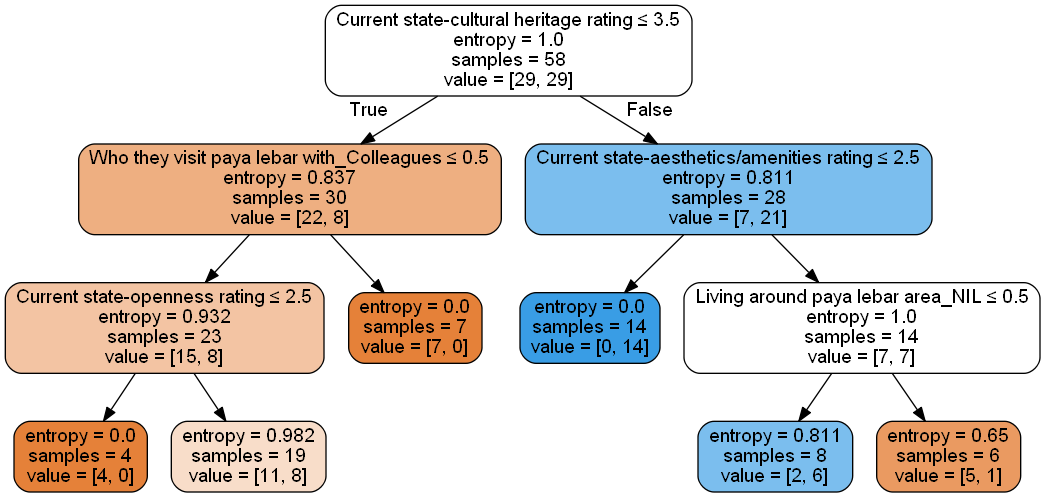

In [13]:
#visualise decision tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = x.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loveTree.png')
Image(graph.create_png())

In [14]:
#evaluation metrics for the classification model
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf

,Predicted pos,Predicted neg
Actual pos,7,1
Actual neg,4,3


In [15]:
#evaluation metrics for the classification model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1=2*((precision*recall_or_sensitivity)/(recall_or_sensitivity+precision))

print('Accuracy',round(accuracy_score(y_test, y_pred),2))
print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))
print("F1 score",round(f1,2))
#weighted average of precision and recall

Accuracy 0.67
Specificity : 0.43
Precision : 0.64
Recall or Sensitivity : 0.88
F1 score 0.74


In [16]:
#determine important features
vi = dt.feature_importances_

n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

Good memories?   : 0.0
Current state-social offerings rating   : 0.0
Current state-openness rating   : 0.096
Current state-aesthetics/amenities rating   : 0.301
Current state-cultural heritage rating   : 0.352
Been to the playground?   : 0.0
Good memories of food?   : 0.0
Restricted by security guard   : 0.0
Accessible/convenient?   : 0.0
Got green spaces/Blue spaces?   : 0.0
Spacious/openness for the place   : 0.0
Convenient for study or working?   : 0.0
Miss old Paya Lebar?   : 0.0
Living around paya lebar area_0-2   : 0.0
Living around paya lebar area_3-5   : 0.0
Living around paya lebar area_6-10   : 0.0
Living around paya lebar area_NIL   : 0.125
Living around paya lebar area_more than 10   : 0.0
Frequency of visit_1-2/week   : 0.0
Frequency of visit_1/ fortnight   : 0.0
Frequency of visit_3-6/week   : 0.0
Frequency of visit_Everyday   : 0.0
Frequency of visit_First time   : 0.0
Who they visit paya lebar with_Alone   : 0.0
Who they visit paya lebar with_Colleagues   : 0.126
Who th

In [17]:
#comparing results with another classification model
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(solver = 'liblinear',C=0.01, random_state = 1)
#hyperparameter tuning by changing the complexity parameter. low C value will leads to more regularisation
#which helps to prevent overfitting
lmodel.fit(X_train,y_train)
y_pred1 = lmodel.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred1, labels = [1,0])
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf


,Predicted pos,Predicted neg
Actual pos,7,1
Actual neg,4,3


In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1=2*((precision*recall_or_sensitivity)/(recall_or_sensitivity+precision))

print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test, y_pred1),2))
print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))
print("F1 score",round(f1,2))


Accuracy for LogisticRegression :
0.67
Specificity : 0.43
Precision : 0.64
Recall or Sensitivity : 0.88
F1 score 0.74


In [19]:
#importance of feature is based on the magnitude of the coefficents
lfeat=lmodel.coef_
# print(lfeat)
# test=abs(lfeat)
sel=np.argsort(lfeat)[::-1]
#print importance features in descending level of importance
print(x.columns[sel])

Index([['Current state-aesthetics/amenities rating', 'Current state-social offerings rating', 'Living around paya lebar area_NIL', 'Who they visit paya lebar with_Colleagues', 'Frequency of visit_3-6/week', 'Frequency of visit_Everyday', 'Who they visit paya lebar with_Working', 'Living around paya lebar area_0-2', 'Good memories of food?', 'Who they visit paya lebar with_Alone', 'Accessible/convenient?', 'Frequency of visit_First time', 'Living around paya lebar area_6-10', 'Current state-openness rating', 'Frequency of visit_1/ fortnight', 'Spacious/openness for the place', 'Who they visit paya lebar with_Family', 'Frequency of visit_1-2/week', 'Living around paya lebar area_3-5', 'Living around paya lebar area_more than 10', 'Who they visit paya lebar with_Friends', 'Convenient for study or working?', 'Good memories?', 'Restricted by security guard', 'Miss old Paya Lebar?', 'Been to the playground?', 'Got green spaces/Blue spaces?', 'Current state-cultural heritage rating']], dtype=